### Study Summary: Impact of Salaries and Employee Experience in Large and Medium-sized Companies

This analysis of salaries and employee experience in large and medium-sized companies uncovered interesting findings and points for further exploration. Here is a summary:

#### Issue 1: Medium-sized Companies Offer Slightly Higher Salaries than Small and Large Companies
- **Finding**: Median salaries are slightly higher in medium-sized companies compared to large and small companies.
- **Counterintuitive Point**: Large companies are generally expected to offer higher salaries due to their resources, but medium-sized companies may offer competitive salaries to attract talent.

### Data Processing and Analysis Methods

#### 1. Data Cleaning and Preprocessing
- Converted salary columns to numeric type.
- Extracted city and state information.
- Converted date columns to datetime type.
- Mapped company size information.

#### 2. Data Analysis and Visualization
- **Salary Distribution**:
  - Analyzed normality of salary distributions.
  - Visualized with box plots and violin plots.

- **Regression Analysis**:
  - Used multiple linear regression to analyze the relationship between salary and company size, job title, experience, employment type, and location.

- **Experience Distribution**:
  - Analyzed and compared experience distribution in large and medium-sized companies.

#### 3. Future Research Directions
- **Salary Factors**:
  - Explore the combined impact of company size, job title, and experience on salary.
  - Investigate salary strategies and employee structures among companies.

- **High-paying Positions**:
  - Study high-paying positions in medium-sized companies to understand market demand and salary levels.
  - Analyze strategies for attracting high-quality talent in large and medium-sized companies.

### Conclusion

The study reveals differences in salaries and employee experience between large and medium-sized companies, highlighting the significant influence of company size, job title, and experience level on salary. Future research can further explore these factors and analyze them in specific industries and market demands.

## Import Packages

In [26]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [27]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 10

%matplotlib inline

warnings.filterwarnings("ignore")

## Import data

In [28]:
df1=pd.read_csv('jobs_in_data.csv')
print(df1.columns)
df1.head(5)

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [29]:
df2=pd.read_csv('QF632_Project_2_b.csv.csv')
print(df2.columns)
df2.head(5)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Engineer,138000,USD,138000,US,0,US,M
1,2024,MI,FT,Data Engineer,86000,USD,86000,US,0,US,M
2,2024,EN,FT,Data Analyst,179000,USD,179000,US,0,US,M
3,2024,EN,FT,Data Analyst,112000,USD,112000,US,0,US,M
4,2024,MI,FT,Business Intelligence Developer,92000,USD,92000,US,0,US,M


In [30]:
df3=pd.read_csv('QF632_Project_2_c.csv')
print(df3.columns)
df3.head(5)

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')


,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [31]:
df4=pd.read_csv('Glassdoor_Salary_Cleaned_Version.csv')
print(df4.columns)
df4.head(5)

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [32]:
h1b_df = pd.read_csv('h1b_combined_5year.csv')
print(h1b_df.columns)
h1b_df.head(5)

Index(['submitdate', 'startdate', 'employer', 'jobtitle', 'basesalary',
       'location'],
      dtype='object')


,submitdate,startdate,employer,jobtitle,basesalary,location
0,2019-02-28,2019-08-21,OPEN DATA GROUP INC,DATA SCIENTIST,"51,860","CHICAGO, IL"
1,2019-03-12,2019-09-06,BLINKAI TECHNOLOGIES INC,DATA SCIENTIST,"59,340","BOSTON, MA"
2,2019-03-05,2019-09-04,DSFEDERAL INC,DATA SCIENTIST,"60,420","ROCKVILLE, MD"
3,2019-03-08,2019-09-04,DSFEDERAL INC,DATA SCIENTIST,"60,420","ROCKVILLE, MD"
4,2019-03-20,2019-09-19,CYBERXDATA LLC,DATA SCIENTIST,"62,000","NEWTON, MA"


## Data Cleaning and Treatment

### Experience Level

In [33]:
print('df1 :', df1['experience_level'].unique())
print('df2 :', df2['experience_level'].unique())
print('df3 :', df3['experience_level'].unique())

df1 : ['Mid-level' 'Senior' 'Executive' 'Entry-level']
df2 : ['MI' 'EN' 'SE' 'EX']
df3 : ['Mid-level' 'Senior-level' 'Entry-level' 'Executive-level']


In [34]:
mapping = {
    'Senior': 'Senior-level',
    'Executive': 'Executive-level',
    'MI': 'Mid-level',
    'EN': 'Entry-level',
    'SE': 'Senior-level',
    'EX': 'Executive-level'
}

In [35]:
df1['experience_level'] = df1['experience_level'].replace(mapping)
df2['experience_level'] = df2['experience_level'].replace(mapping)

In [36]:
print('df1 :', df1['experience_level'].unique())
print('df2 :', df2['experience_level'].unique())

df1 : ['Mid-level' 'Senior-level' 'Executive-level' 'Entry-level']
df2 : ['Mid-level' 'Entry-level' 'Senior-level' 'Executive-level']


### Job Category

In [37]:
df1['job_category'].unique()

array(['Data Engineering', 'Data Architecture and Modeling',
       'Data Science and Research', 'Machine Learning and AI',
       'Data Analysis', 'Leadership and Management',
       'BI and Visualization', 'Data Quality and Operations',
       'Data Management and Strategy', 'Cloud and Database'], dtype=object)

In [38]:
group = df1.groupby('job_category')['job_title'].unique().apply(list).reset_index()
group = group.explode('job_title').reset_index(drop = True)

In [39]:
group.to_csv('group.csv', index=False)

In [40]:
df2['job_category'] = None

for i, row in df2.iterrows():
    matched_category = group[group['job_title'] == row['job_title']]['job_category']
    if not matched_category.empty:
        df2.at[i, 'job_category'] = matched_category.values[0]

In [41]:
df2[df2['job_category'].isna()]['job_title'].unique()

array(['Data Science', 'Prompt Engineer', 'Data Quality Manager',
       'AI Product Manager', 'Data Analyst Lead',
       'Marketing Data Scientist', 'Principal Data Architect'],
      dtype=object)

In [42]:
def assign_job_category(job_title):
    if 'Data Science' in job_title or 'Marketing Data Scientist' in job_title:
        return 'Data Science and Research'
    elif 'Prompt Engineer' in job_title:
        return 'Machine Learning and AI'
    else:
        return 'Leadership and Management'

# Apply the function to the DataFrame to update the job_category column
df2['job_category'] = df2.apply(
    lambda row: assign_job_category(row['job_title']) if pd.isna(row['job_category']) else row['job_category'],
    axis=1
)
df2['job_category'].isna().sum()

0

In [43]:
df3['job_category'] = None

for i, row in df3.iterrows():
    matched_category = group[group['job_title'] == row['job_title']]['job_category']
    if not matched_category.empty:
        df3.at[i, 'job_category'] = matched_category.values[0]

In [44]:
df3[df3['job_category'].isna()]['job_title'].unique()

array(['Data Science', 'Prompt Engineer', 'Marketing Data Scientist',
       'Data Analyst Lead', 'AI Product Manager', 'Data Quality Manager',
       'Principal Data Architect'], dtype=object)

In [45]:
# Apply the function to the DataFrame to update the job_category column
df3['job_category'] = df3.apply(
    lambda row: assign_job_category(row['job_title']) if pd.isna(row['job_category']) else row['job_category'],
    axis=1
)
df3['job_category'].isna().sum()

0

In [46]:
df3['job_category'].nunique()

10

In [47]:
df4['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

In [48]:
df4['Job Category'] = None

def assign_job_category_df4(job_title):
    if 'Data Scientist' in job_title or 'Research Scientist' in job_title:
        return 'Data Science and Research'
    elif 'Machine Learning' in job_title or 'ML' in job_title:
        return 'Machine Learning and AI'
    elif 'Data Engineer' in job_title:
        return 'Data Engineering'
    elif 'Data Architect' in job_title or 'Data Modeler' in job_title:
        return 'Data Architecture and Modeling'
    elif 'Data Analyst' in job_title:
        return 'Data Analysis'
    elif 'BI' in job_title or 'Visualization' in job_title:
        return 'BI and Visualization'
    elif 'Data Quality' in job_title:
        return 'Data Quality and Operations'
    elif 'Data Management' in job_title or 'Strategy' in job_title:
        return 'Data Management and Strategy'
    elif 'Cloud' in job_title or 'Database' in job_title:
        return 'Cloud and Database'
    else:
        return 'Leadership and Management'

# Apply the function to assign job categories
df4['Job Category'] = df4['Job Title'].apply(assign_job_category_df4)

### Employment Type

In [49]:
print('df1 :', df1['employment_type'].unique())
print('df2 :', df2['employment_type'].unique())
print('df3 :', df3['employment_type'].unique())

df1 : ['Full-time' 'Part-time' 'Contract' 'Freelance']
df2 : ['FT' 'PT' 'CT' 'FL']
df3 : ['Full-time' 'Part-time' 'Contract' 'Freelance']


In [50]:
mapping_employment = {
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
}

In [51]:
df2['employment_type'] = df2['employment_type'].replace(mapping_employment)
print('df2 :', df2['employment_type'].unique())

df2 : ['Full-time' 'Part-time' 'Contract' 'Freelance']


### Work Setting

In [52]:
print('df1 :', df1['work_setting'].unique())
print('df2 :', df2['remote_ratio'].unique())
print('df3 :', df3['work_models'].unique())

df1 : ['Hybrid' 'In-person' 'Remote']
df2 : [  0 100  50]
df3 : ['Remote' 'On-site' 'Hybrid']


In [53]:
mapping_work = {
    'In-person': 'On-site',
    0: 'Remote',
    100: 'On-site',
    50: 'Hybrid'
}

In [54]:
df1['work_setting'] = df1['work_setting'].replace(mapping_work)
print('df1 :', df1['work_setting'].unique())

df1 : ['Hybrid' 'On-site' 'Remote']


In [55]:
df2['remote_ratio'] = df2['remote_ratio'].astype('category')
df2['remote_ratio'] = df2['remote_ratio'].map(mapping_work)
print('df2 :', df2['remote_ratio'].unique())

df2 : ['Remote', 'On-site', 'Hybrid']
Categories (3, object): ['Remote', 'Hybrid', 'On-site']


In [56]:
df2 = df2.rename(columns={'remote_ratio': 'work_setting'})
df3 = df3.rename(columns={'work_models': 'work_setting'})

### Employee Residence & Company Location

In [57]:
print('df2 :', df2['employee_residence'].unique())

df2 : ['US' 'CA' 'GB' 'PT' 'IE' 'DE' 'ZA' 'AU' 'NZ' 'HU' 'IN' 'ES' 'VN' 'NG'
 'PH' 'PL' 'FR' 'CZ' 'NL' 'PK' 'UA' 'LT' 'UG' 'CO' 'IT' 'SI' 'RO' 'GR'
 'LV' 'MU' 'AM' 'HR' 'TH' 'KR' 'EE' 'TR' 'BR' 'QA' 'RU' 'KE' 'TN' 'GH'
 'BE' 'CH' 'AD' 'EC' 'PE' 'MX' 'MD' 'SA' 'NO' 'AR' 'EG' 'UZ' 'GE' 'JP'
 'HK' 'CF' 'FI' 'IL' 'AT' 'SG' 'SE' 'KW' 'CY' 'BA' 'IR' 'AS' 'CN' 'CR'
 'CL' 'PR' 'DK' 'BO' 'DO' 'ID' 'AE' 'MY' 'HN' 'DZ' 'IQ' 'BG' 'JE' 'RS'
 'LU' 'MT']


In [58]:
print('df2 :', df2['company_location'].unique())

df2 : ['US' 'CA' 'GB' 'PT' 'IE' 'DE' 'ZA' 'AU' 'NZ' 'HU' 'IN' 'ES' 'VN' 'NG'
 'PH' 'PL' 'FR' 'NL' 'LU' 'LT' 'GI' 'CO' 'UA' 'SI' 'RO' 'GR' 'LV' 'MU'
 'RU' 'IT' 'KR' 'EE' 'CZ' 'CH' 'BR' 'QA' 'KE' 'DK' 'GH' 'SE' 'TR' 'AD'
 'EC' 'MX' 'IL' 'SA' 'NO' 'AR' 'JP' 'HK' 'CF' 'FI' 'SG' 'TH' 'HR' 'AM'
 'BA' 'PK' 'IR' 'BS' 'AT' 'PR' 'AS' 'BE' 'ID' 'EG' 'AE' 'MY' 'HN' 'DZ'
 'IQ' 'CN' 'CL' 'MD' 'MT']


In [59]:
country_mapping = {
    'US': 'United States',
    'CA': 'Canada',
    'GB': 'United Kingdom',
    'PT': 'Portugal',
    'IE': 'Ireland',
    'DE': 'Germany',
    'ZA': 'South Africa',
    'AU': 'Australia',
    'NZ': 'New Zealand',
    'HU': 'Hungary',
    'IN': 'India',
    'ES': 'Spain',
    'VN': 'Vietnam',
    'NG': 'Nigeria',
    'PH': 'Philippines',
    'PL': 'Poland',
    'FR': 'France',
    'CZ': 'Czech Republic',
    'NL': 'Netherlands',
    'PK': 'Pakistan',
    'UA': 'Ukraine',
    'LT': 'Lithuania',
    'UG': 'Uganda',
    'CO': 'Colombia',
    'IT': 'Italy',
    'SI': 'Slovenia',
    'RO': 'Romania',
    'GR': 'Greece',
    'LV': 'Latvia',
    'MU': 'Mauritius',
    'AM': 'Armenia',
    'HR': 'Croatia',
    'TH': 'Thailand',
    'KR': 'South Korea',
    'EE': 'Estonia',
    'TR': 'Turkey',
    'BR': 'Brazil',
    'QA': 'Qatar',
    'RU': 'Russia',
    'KE': 'Kenya',
    'TN': 'Tunisia',
    'GH': 'Ghana',
    'BE': 'Belgium',
    'CH': 'Switzerland',
    'AD': 'Andorra',
    'EC': 'Ecuador',
    'PE': 'Peru',
    'MX': 'Mexico',
    'MD': 'Moldova',
    'SA': 'Saudi Arabia',
    'NO': 'Norway',
    'AR': 'Argentina',
    'EG': 'Egypt',
    'UZ': 'Uzbekistan',
    'GE': 'Georgia',
    'JP': 'Japan',
    'HK': 'Hong Kong',
    'CF': 'Central African Republic',
    'FI': 'Finland',
    'IL': 'Israel',
    'AT': 'Austria',
    'SG': 'Singapore',
    'SE': 'Sweden',
    'KW': 'Kuwait',
    'CY': 'Cyprus',
    'BA': 'Bosnia and Herzegovina',
    'IR': 'Iran',
    'AS': 'American Samoa',
    'CN': 'China',
    'CR': 'Costa Rica',
    'CL': 'Chile',
    'PR': 'Puerto Rico',
    'DK': 'Denmark',
    'BO': 'Bolivia',
    'DO': 'Dominican Republic',
    'ID': 'Indonesia',
    'AE': 'United Arab Emirates',
    'MY': 'Malaysia',
    'HN': 'Honduras',
    'DZ': 'Algeria',
    'IQ': 'Iraq',
    'BG': 'Bulgaria',
    'JE': 'Jersey',
    'RS': 'Serbia',
    'LU': 'Luxembourg',
    'MT': 'Malta',
    'GI': 'Gibraltar',
    'BS': 'Bahamas'
}

In [60]:
df2['employee_residence'] = df2['employee_residence'].replace(country_mapping)
df2['company_location'] = df2['company_location'].replace(country_mapping)

In [61]:
print('df2 :', df2['employee_residence'].unique())
print('df2 :', df2['company_location'].unique())

df2 : ['United States' 'Canada' 'United Kingdom' 'Portugal' 'Ireland' 'Germany'
 'South Africa' 'Australia' 'New Zealand' 'Hungary' 'India' 'Spain'
 'Vietnam' 'Nigeria' 'Philippines' 'Poland' 'France' 'Czech Republic'
 'Netherlands' 'Pakistan' 'Ukraine' 'Lithuania' 'Uganda' 'Colombia'
 'Italy' 'Slovenia' 'Romania' 'Greece' 'Latvia' 'Mauritius' 'Armenia'
 'Croatia' 'Thailand' 'South Korea' 'Estonia' 'Turkey' 'Brazil' 'Qatar'
 'Russia' 'Kenya' 'Tunisia' 'Ghana' 'Belgium' 'Switzerland' 'Andorra'
 'Ecuador' 'Peru' 'Mexico' 'Moldova' 'Saudi Arabia' 'Norway' 'Argentina'
 'Egypt' 'Uzbekistan' 'Georgia' 'Japan' 'Hong Kong'
 'Central African Republic' 'Finland' 'Israel' 'Austria' 'Singapore'
 'Sweden' 'Kuwait' 'Cyprus' 'Bosnia and Herzegovina' 'Iran'
 'American Samoa' 'China' 'Costa Rica' 'Chile' 'Puerto Rico' 'Denmark'
 'Bolivia' 'Dominican Republic' 'Indonesia' 'United Arab Emirates'
 'Malaysia' 'Honduras' 'Algeria' 'Iraq' 'Bulgaria' 'Jersey' 'Serbia'
 'Luxembourg' 'Malta']
df2 : ['United Sta

### Company Size

In [62]:
print('df1 :', df1['company_size'].unique())
print('df2 :', df2['company_size'].unique())
print('df3 :', df3['company_size'].unique())

df1 : ['L' 'M' 'S']
df2 : ['M' 'L' 'S']
df3 : ['Medium' 'Large' 'Small']


In [63]:
mapping_size = {
    'L': 'Large',
    'M': 'Medium',
    'S': 'Small',
}

In [64]:
df1['company_size'] = df1['company_size'].replace(mapping_size)
df2['company_size'] = df2['company_size'].replace(mapping_size)

In [65]:
print('df1 :', df1['company_size'].unique())
print('df2 :', df2['company_size'].unique())

df1 : ['Large' 'Medium' 'Small']
df2 : ['Medium' 'Large' 'Small']


## Combined

In [66]:
df4['Job Category'].value_counts()

Job Category
Data Science and Research         300
Leadership and Management         194
Data Engineering                  119
Data Analysis                      99
Machine Learning and AI            17
BI and Visualization                6
Data Architecture and Modeling      5
Data Management and Strategy        2
Name: count, dtype: int64

### df1, df2 and df3

In [67]:
df1.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [68]:
df2 = df2[['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size']]

In [69]:
df3 = df3[['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size']]

In [99]:
combined_df1 = pd.concat([df1, df2, df3])
combined_df1['work_year'] = pd.to_datetime(combined_df1['work_year'], format='%Y', errors='coerce')

combined_df1['salary_in_usd'] = pd.to_numeric(combined_df1['salary_in_usd'], errors='coerce')

combined_df1['job_title'] = combined_df1['job_title'].str.upper()
combined_df1['company_location'] = combined_df1['company_location'].str.upper()

combined_df1 = combined_df1.reset_index(drop = True)
combined_df1.head(5)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023-01-01,DATA DEVOPS ENGINEER,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,GERMANY,Large
1,2023-01-01,DATA ARCHITECT,Data Architecture and Modeling,USD,186000,186000,United States,Senior-level,Full-time,On-site,UNITED STATES,Medium
2,2023-01-01,DATA ARCHITECT,Data Architecture and Modeling,USD,81800,81800,United States,Senior-level,Full-time,On-site,UNITED STATES,Medium
3,2023-01-01,DATA SCIENTIST,Data Science and Research,USD,212000,212000,United States,Senior-level,Full-time,On-site,UNITED STATES,Medium
4,2023-01-01,DATA SCIENTIST,Data Science and Research,USD,93300,93300,United States,Senior-level,Full-time,On-site,UNITED STATES,Medium


### df4 and h1b (US data)

In [71]:
df4['Company Name'] = np.array([item.split('\n')[0].upper() for item in df4['Company Name']])

In [72]:
df4_selected = df4[['Job Title', 'Company Name', 'Location', 'avg_salary', 'Job Category']]
h1b_selected = h1b_df[['employer', 'jobtitle', 'basesalary', 'location']]

In [73]:
df4_selected = df4_selected.rename(columns={
    'Job Title': 'job_title',
    'Company Name': 'company_name',
    'Location': 'location',
    'avg_salary': 'base_salary',
    'job_category': 'Job Category'
})

h1b_selected = h1b_selected.rename(columns={
    'jobtitle': 'job_title',
    'employer': 'company_name',
    'basesalary': 'base_salary'
})

In [74]:
df4_selected['job_title'] = df4_selected['job_title'].str.upper()
df4_selected['location'] = df4_selected['location'].str.upper()
df4_selected['base_salary'] = df4_selected['base_salary'] * 1000

In [75]:
combined_df2_us = pd.concat([df4_selected, h1b_selected])

## combined_df1

### Basic Visualisation

In [100]:
combined_df1.drop_duplicates(inplace=True)

In [101]:
combined_df1.to_excel("combined_df1.xlsx", index=False)

In [102]:
job_title_counts = combined_df1['job_title'].value_counts().sort_values(ascending = False)
job_title_counts.head()

job_title
DATA ENGINEER                2234
DATA SCIENTIST               2113
DATA ANALYST                 1567
MACHINE LEARNING ENGINEER    1109
ANALYTICS ENGINEER            449
Name: count, dtype: int64

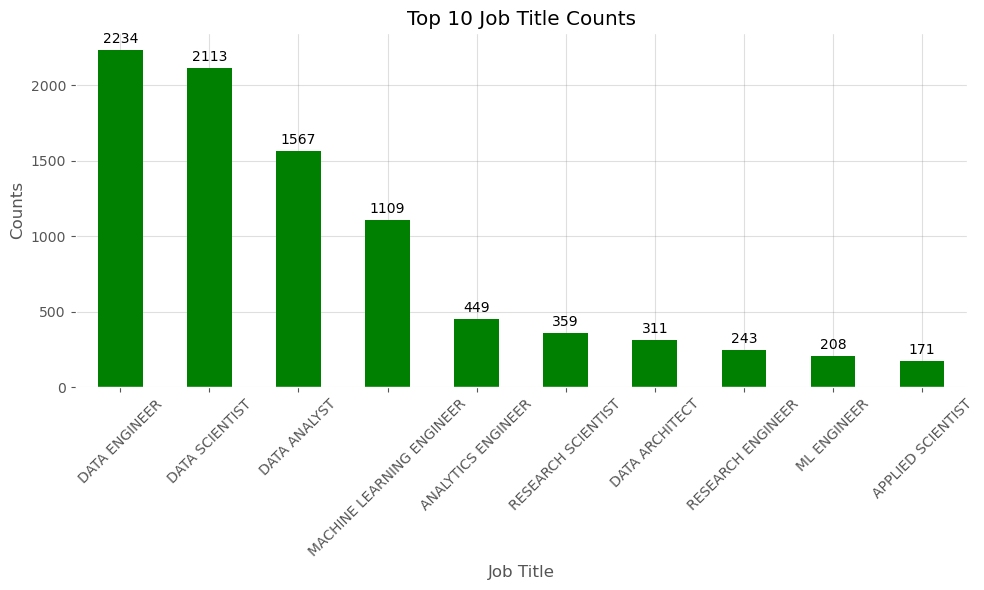

In [113]:
# Select the top 10 job titles
top_10_job_title_counts = job_title_counts.head(10)

# Plotting a bar chart for the top 10 job titles
plt.figure(figsize=(10, 6))
ax = top_10_job_title_counts.plot(kind='bar', color='green')
plt.title('Top 10 Job Title Counts')
plt.xlabel('Job Title')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)
    
plt.savefig('counts.png', dpi = 300, bbox_inches='tight')
plt.show()


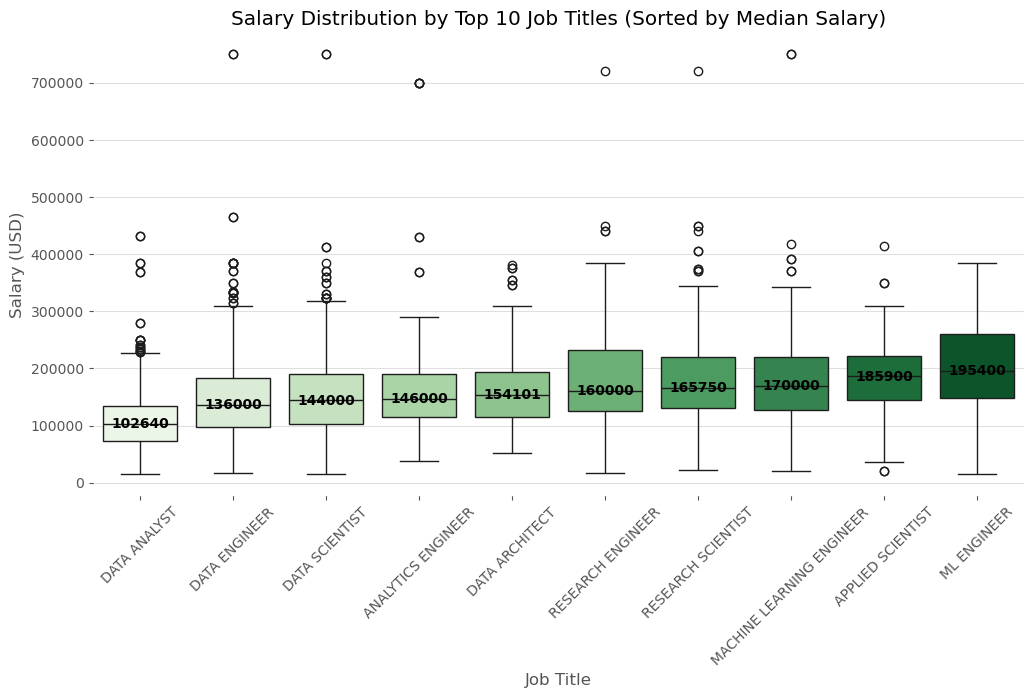

In [108]:
top_10_job_titles = job_title_counts.head(10).index
filtered_df = combined_df1[combined_df1['job_title'].isin(top_10_job_titles)]
median_salaries = filtered_df.groupby('job_title')['salary_in_usd'].median()
sorted_job_titles = median_salaries.sort_values().index
palette = sns.color_palette("husl", len(sorted_job_titles))

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='job_title',
                 y='salary_in_usd',
                 data=filtered_df,
                 order=sorted_job_titles,
                 palette="Greens")
plt.xticks(rotation=45)
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution by Top 10 Job Titles (Sorted by Median Salary)')

medians = filtered_df.groupby(
    ['job_title'])['salary_in_usd'].median().reindex(sorted_job_titles)
for i, median in enumerate(medians):
    ax.text(i,
            median,
            f'{median:.0f}',
            ha='center',
            va='center',
            fontweight='bold',
            color='black',
            size=10)

#plt.savefig('salary.png', dpi = 300, bbox_inches='tight')

plt.show()

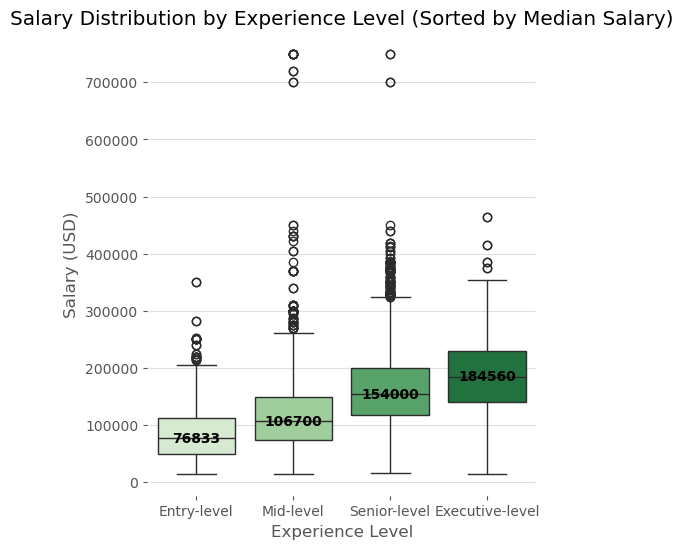

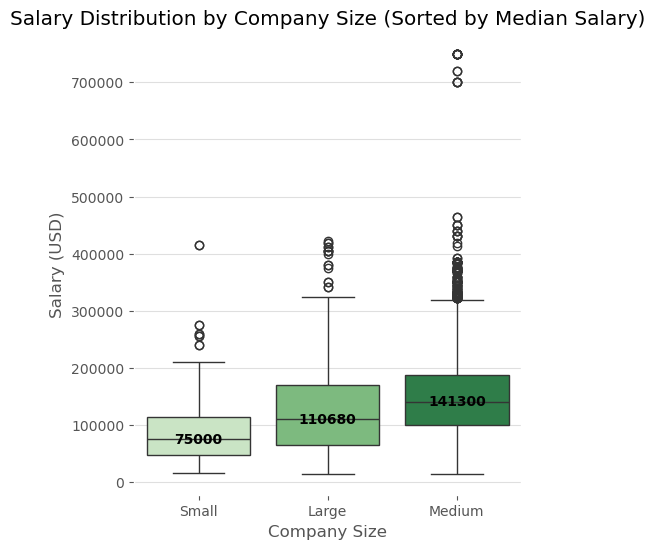

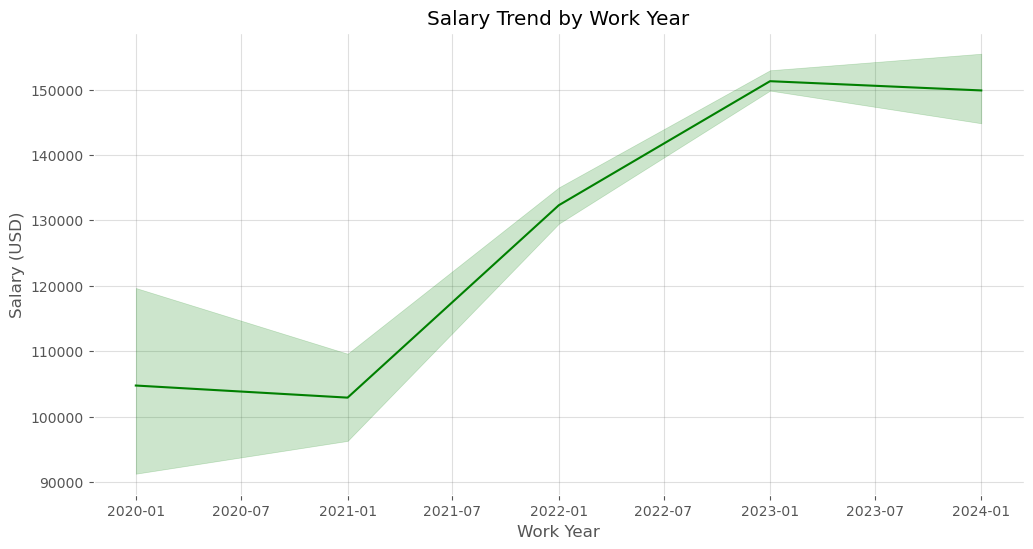

In [111]:
median_experience_salaries = combined_df1.groupby('experience_level')['salary_in_usd'].median()
median_company_size_salaries = combined_df1.groupby(
    'company_size')['salary_in_usd'].median()

sorted_experience_levels = median_experience_salaries.sort_values().index
sorted_company_sizes = median_company_size_salaries.sort_values().index

plt.figure(figsize=(5, 6))
ax_experience = sns.boxplot(x='experience_level',
                            y='salary_in_usd',
                            data=combined_df1,
                            order=sorted_experience_levels,
                            palette="Greens")
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution by Experience Level (Sorted by Median Salary)')

medians_experience = combined_df1.groupby(
    ['experience_level'])['salary_in_usd'].median().reindex(sorted_experience_levels)
for i, median in enumerate(medians_experience):
    ax_experience.text(i,
                       median,
                       f'{median:.0f}',
                       ha='center',
                       va='center',
                       fontweight='bold',
                       color='black',
                       size=10)
plt.savefig('experience.png', dpi = 300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(5, 6))
ax_company_size = sns.boxplot(x='company_size',
                              y='salary_in_usd',
                              data=combined_df1,
                              order=sorted_company_sizes,
                              palette="Greens")
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution by Company Size (Sorted by Median Salary)')

medians_company_size = combined_df1.groupby(
    ['company_size'])['salary_in_usd'].median().reindex(sorted_company_sizes)
for i, median in enumerate(medians_company_size):
    ax_company_size.text(i,
                         median,
                         f'{median:.0f}',
                         ha='center',
                         va='center',
                         fontweight='bold',
                         color='black',
                         size=10)
plt.savefig('size.png', dpi = 300, bbox_inches='tight')
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=combined_df1, color="green")
plt.xlabel('Work Year')
plt.ylabel('Salary (USD)')
plt.title('Salary Trend by Work Year')
plt.savefig('salarytrend.png', dpi = 300, bbox_inches='tight')
plt.show()

#### 1. Medium-sized Companies Offer Slightly Higher Salaries than Small and Large Companies

**Counterintuitive Point**:
- Conventionally, it is believed that large companies, with abundant resources, should offer higher salaries than medium-sized and small companies. However, the data indicates that the median salary at medium-sized companies is slightly higher than at large and small companies. This could be due to medium-sized companies offering more competitive salaries to attract high-quality talent, but this requires further in-depth analysis and validation.

**Research Direction**:
- Analyze the distribution of positions within different company sizes to see if certain high-paying roles are concentrated in medium-sized companies.
- Examine the unique aspects of medium-sized companies' recruitment strategies, market positioning, and salary structures, which may include flexibility, rapid decision-making, and innovation incentives.

In [104]:
company_size_counts = combined_df1['company_size'].value_counts()

company_size_counts_df = company_size_counts.reset_index()
company_size_counts_df.columns = ['Company Size', 'Count']

company_size_counts_df

,Company Size,Count
0,Medium,10330
1,Large,978
2,Small,304


Medium Company Salaries - Shapiro-Wilk Test: Statistics=0.9302657842636108, p-value=0.0
Large Company Salaries - Shapiro-Wilk Test: Statistics=0.9357341527938843, p-value=4.139801474519221e-20


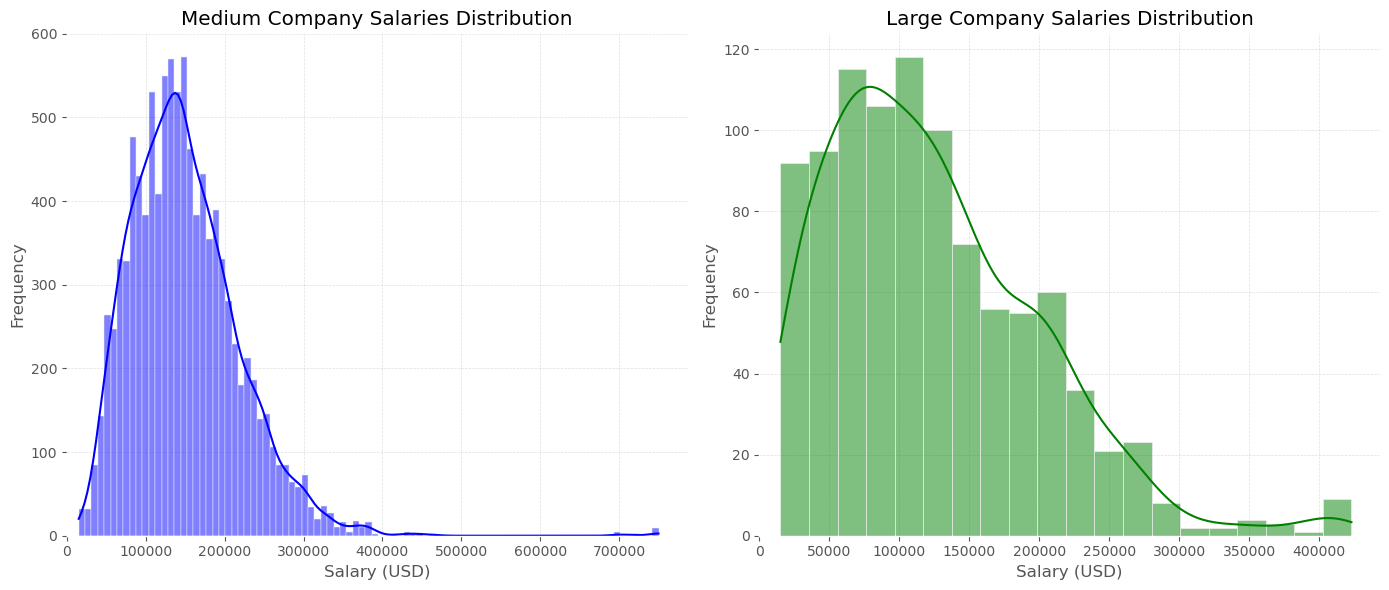

In [105]:
import scipy.stats as stats

medium_company_salaries = combined_df1[combined_df1['company_size'] == 'Medium']['salary_in_usd']
large_company_salaries = combined_df1[combined_df1['company_size'] == 'Large']['salary_in_usd']

medium_stat, medium_p = stats.shapiro(medium_company_salaries)
print(f"Medium Company Salaries - Shapiro-Wilk Test: Statistics={medium_stat}, p-value={medium_p}")

large_stat, large_p = stats.shapiro(large_company_salaries)
print(f"Large Company Salaries - Shapiro-Wilk Test: Statistics={large_stat}, p-value={large_p}")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(medium_company_salaries, kde=True, color='blue')
plt.title('Medium Company Salaries Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)  # Ensure grid is below the plot

plt.subplot(1, 2, 2)
sns.histplot(large_company_salaries, kde=True, color='green')
plt.title('Large Company Salaries Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)  

plt.tight_layout()

for ax in plt.gcf().axes:
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)

plt.show()

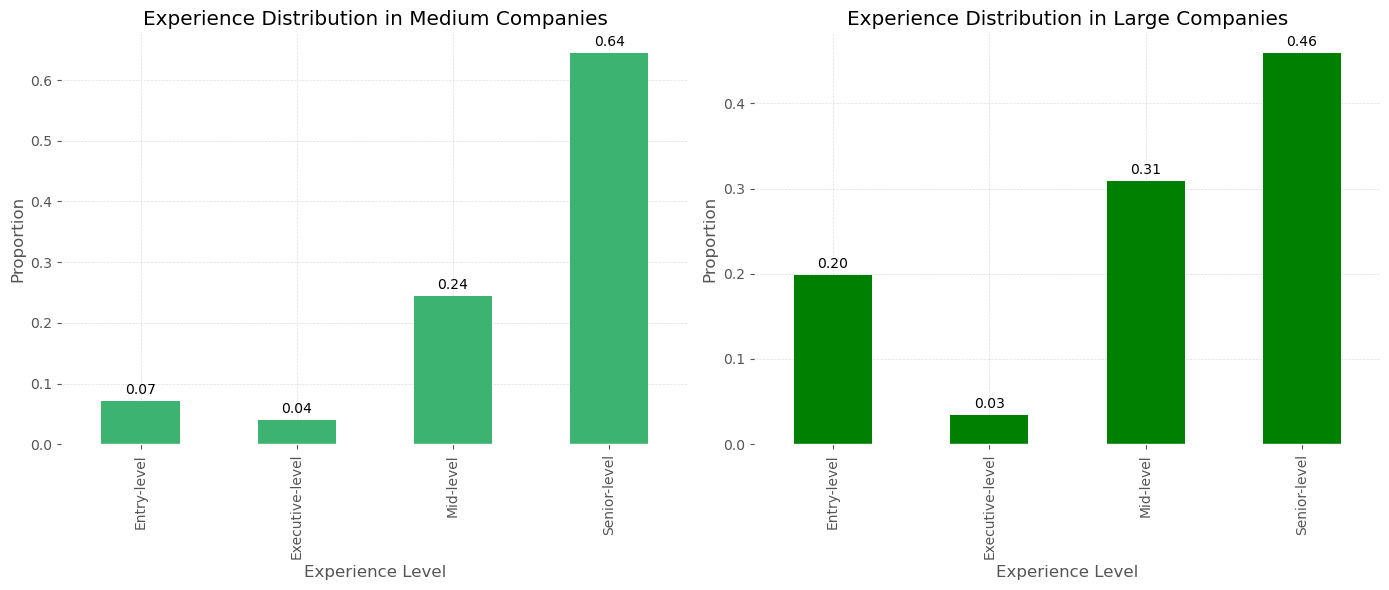

In [119]:
# Calculate experience level distribution
medium_company_experience = combined_df1[combined_df1['company_size'] == 'Medium']['experience_level'].value_counts(normalize=True).sort_index()
large_company_experience = combined_df1[combined_df1['company_size'] == 'Large']['experience_level'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ax1 = medium_company_experience.plot(kind='bar', color='mediumseagreen')
plt.title('Experience Distribution in Medium Companies')
plt.xlabel('Experience Level')
plt.ylabel('Proportion')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)  

# Adding labels to bars
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge', padding=3, fmt='%.2f')

plt.subplot(1, 2, 2)
ax2 = large_company_experience.plot(kind='bar', color='green')
plt.title('Experience Distribution in Large Companies')
plt.xlabel('Experience Level')
plt.ylabel('Proportion')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)  

# Adding labels to bars
for container in ax2.containers:
    ax2.bar_label(container, label_type='edge', padding=3, fmt='%.2f')

plt.tight_layout()
plt.show()

<Figure size 400x800 with 0 Axes>

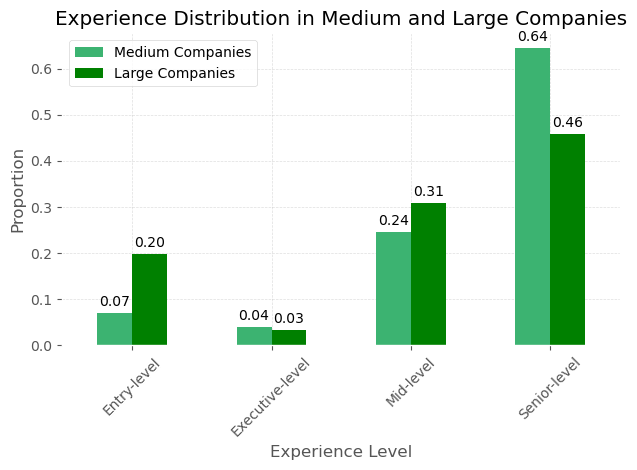

In [136]:
medium_company_experience = combined_df1[combined_df1['company_size'] == 'Medium']['experience_level'].value_counts(normalize=True).sort_index()
large_company_experience = combined_df1[combined_df1['company_size'] == 'Large']['experience_level'].value_counts(normalize=True).sort_index()

# Create a DataFrame to combine the two distributions
combined_experience = pd.DataFrame({
    'Medium Companies': medium_company_experience,
    'Large Companies': large_company_experience
})

# Plotting the combined bar chart
plt.figure(figsize=(4, 8))
ax = combined_experience.plot(kind='bar', color=['mediumseagreen', 'green'], width=0.5)
plt.title('Experience Distribution in Medium and Large Companies')
plt.xlabel('Experience Level')
plt.ylabel('Proportion')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.gca().set_axisbelow(True)

# Adding labels to bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fmt='%.2f')

plt.tight_layout()

plt.savefig('experience.png', dpi = 300, bbox_inches='tight')

plt.show()

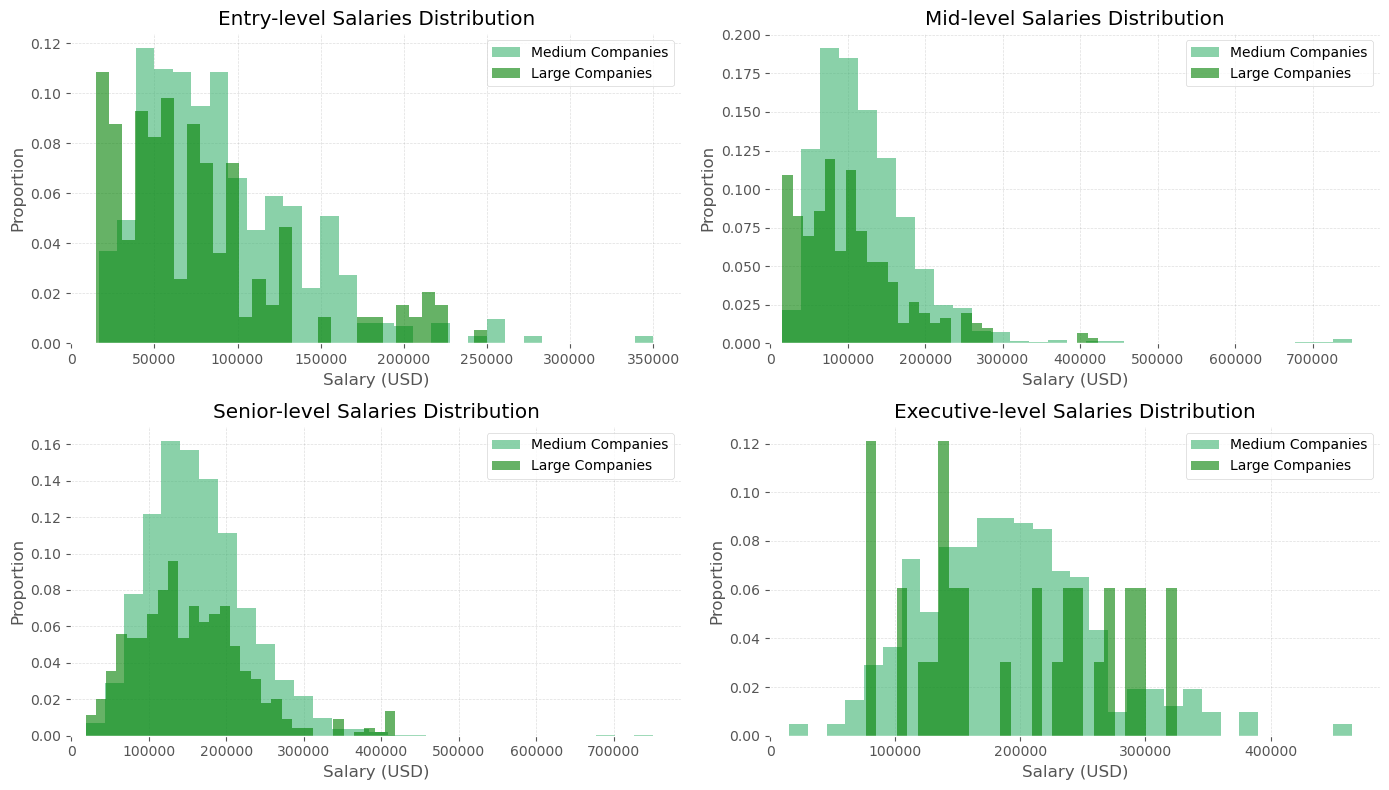

In [137]:
experience_levels = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level']

plt.figure(figsize=(14, 8))

for i, level in enumerate(experience_levels):
    plt.subplot(2, 2, i + 1)
    
    medium_salaries = combined_df1[(combined_df1['company_size'] == 'Medium') & (combined_df1['experience_level'] == level)]['salary_in_usd']
    large_salaries = combined_df1[(combined_df1['company_size'] == 'Large') & (combined_df1['experience_level'] == level)]['salary_in_usd']
    
    medium_weights = np.ones_like(medium_salaries) / len(medium_salaries)
    large_weights = np.ones_like(large_salaries) / len(large_salaries)
    
    plt.hist(medium_salaries, bins=30, weights=medium_weights, alpha=0.6, color='mediumseagreen', label='Medium Companies', density=False)
    plt.hist(large_salaries, bins=30, weights=large_weights, alpha=0.6, color='green', label='Large Companies', density=False)
    
    plt.title(f'{level} Salaries Distribution')
    plt.xlabel('Salary (USD)')
    plt.ylabel('Proportion')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.gca().set_axisbelow(True)
    
    plt.xlim(left=0)
    plt.ylim(bottom=0)

plt.tight_layout()

plt.savefig('experience_salaries.png', dpi = 300, bbox_inches='tight')

plt.show()


#### Conclusion

- **Medium-sized Companies**: Have a higher proportion of senior-level employees, indicating a preference for hiring experienced staff to manage complex tasks with fewer resources.
- **Large Companies**: Show a more balanced distribution of experience levels, likely due to comprehensive training and promotion systems.

Medium-sized companies focus on experienced employees to handle complex work, while large companies benefit from a more even spread of experience levels, supported by strong internal development programs.

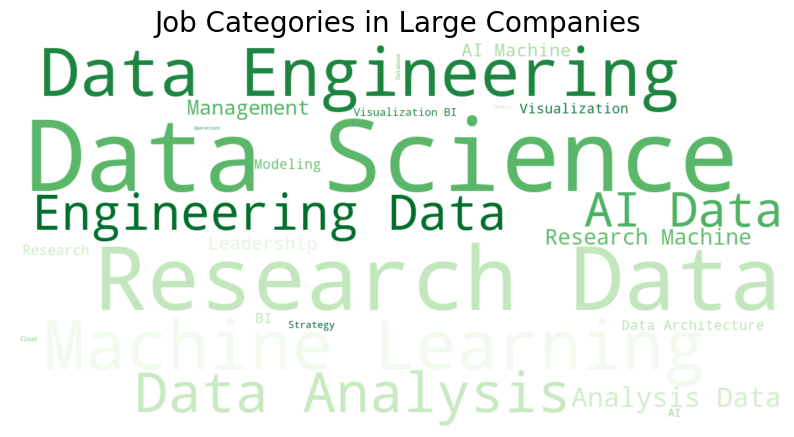

Medium Companies - Top 5 Job Categories with Average Salary:
                Job Category  Average Salary
1  Data Science and Research   161410.718521
2           Data Engineering   146993.201482
3    Machine Learning and AI   181701.658679
4              Data Analysis   108536.949602
5  Leadership and Management   148049.767196


Large Companies - Top 5 Job Categories with Average Salary:
                Job Category  Average Salary
1  Data Science and Research   133290.300000
2    Machine Learning and AI   128801.374269
3           Data Engineering   113861.735849
4              Data Analysis    83675.921986
5  Leadership and Management   153235.333333


In [141]:
from wordcloud import WordCloud

medium_company_jobs = combined_df1[combined_df1['company_size'] == 'Medium']['job_category']
large_company_jobs = combined_df1[combined_df1['company_size'] == 'Large']['job_category']

def generate_wordcloud(data, title, colormap):
    wordcloud = WordCloud(width=1200,
                          height=600,
                          background_color='white',
                          colormap=colormap).generate(' '.join(data))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.savefig('worldcloud.png', dpi = 300, bbox_inches='tight')
    plt.show()

#generate_wordcloud(medium_company_jobs, 'Job Categories in Medium Companies', 'Greens')
generate_wordcloud(large_company_jobs, 'Job Categories in Large Companies', 'Greens')

medium_top_jobs = medium_company_jobs.value_counts().head(5).index
large_top_jobs = large_company_jobs.value_counts().head(5).index

medium_avg_salaries = combined_df1[combined_df1['company_size'] == 'Medium'].groupby(
    'job_category')['salary_in_usd'].mean().loc[medium_top_jobs]
large_avg_salaries = combined_df1[combined_df1['company_size'] == 'Large'].groupby(
    'job_category')['salary_in_usd'].mean().loc[large_top_jobs]

medium_top_jobs_df = pd.DataFrame({
    'Job Category': medium_top_jobs,
    'Average Salary': medium_avg_salaries.values
})
large_top_jobs_df = pd.DataFrame({
    'Job Category': large_top_jobs,
    'Average Salary': large_avg_salaries.values
})

medium_top_jobs_df.index = medium_top_jobs_df.index + 1
large_top_jobs_df.index = large_top_jobs_df.index + 1

print("Medium Companies - Top 5 Job Categories with Average Salary:")
print(medium_top_jobs_df)
print("\n")
print("Large Companies - Top 5 Job Categories with Average Salary:")
print(large_top_jobs_df)


#### Conclusion

The average salary in medium-sized companies is higher than in large companies:

- Medium-sized companies offer the highest average salary in Machine Learning and AI at $181,701.66.
- Large companies offer the highest average salary in Leadership and Management at $153,235.33.
- Data Science and Research is the most common job category, with medium-sized companies offering a higher average salary ($161,410.72) compared to large companies ($133,290.30).
- Data Engineering and Machine Learning and AI salaries are generally higher in medium-sized companies.
- Data Analysis has the lowest average salary in large companies ($83,675.92) and a higher average salary in medium-sized companies ($108,536.95).

### OLS

In [142]:
combined_df1.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [143]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

formula = 'salary_in_usd ~ C(company_size) + C(job_title) + C(employee_residence) + C(job_category) + C(experience_level) + C(employment_type) + C(work_setting) + C(company_location)'

model = ols(formula, data=combined_df1).fit()

anova_results = sm.stats.anova_lm(model, typ=1)
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
C(company_size),2.0,1.619276e+12,8.096382e+11,249.770121,7.051539e-107
C(job_title),131.0,9.989835e+12,7.625828e+10,23.525374,0.000000e+00
C(employee_residence),86.0,7.196323e+12,8.367817e+10,25.814379,0.000000e+00
C(job_category),9.0,1.486448e+10,1.651609e+09,0.509515,8.687934e-01
C(experience_level),3.0,2.983587e+12,9.945289e+11,306.808170,1.584351e-191
C(employment_type),3.0,5.371438e+09,1.790479e+09,0.552356,6.465313e-01
C(work_setting),2.0,3.484477e+10,1.742238e+10,5.374735,4.643958e-03
C(company_location),75.0,2.792508e+11,3.723344e+09,1.148637,1.791041e-01
Residual,11336.0,3.674602e+13,3.241533e+09,NaN,NaN


In [144]:
significant_vars = anova_results[anova_results['PR(>F)'] < 0.05].index
print(f'Significant variables: {significant_vars}')

Significant variables: Index(['C(company_size)', 'C(job_title)', 'C(employee_residence)',
       'C(experience_level)', 'C(work_setting)'],
      dtype='object')


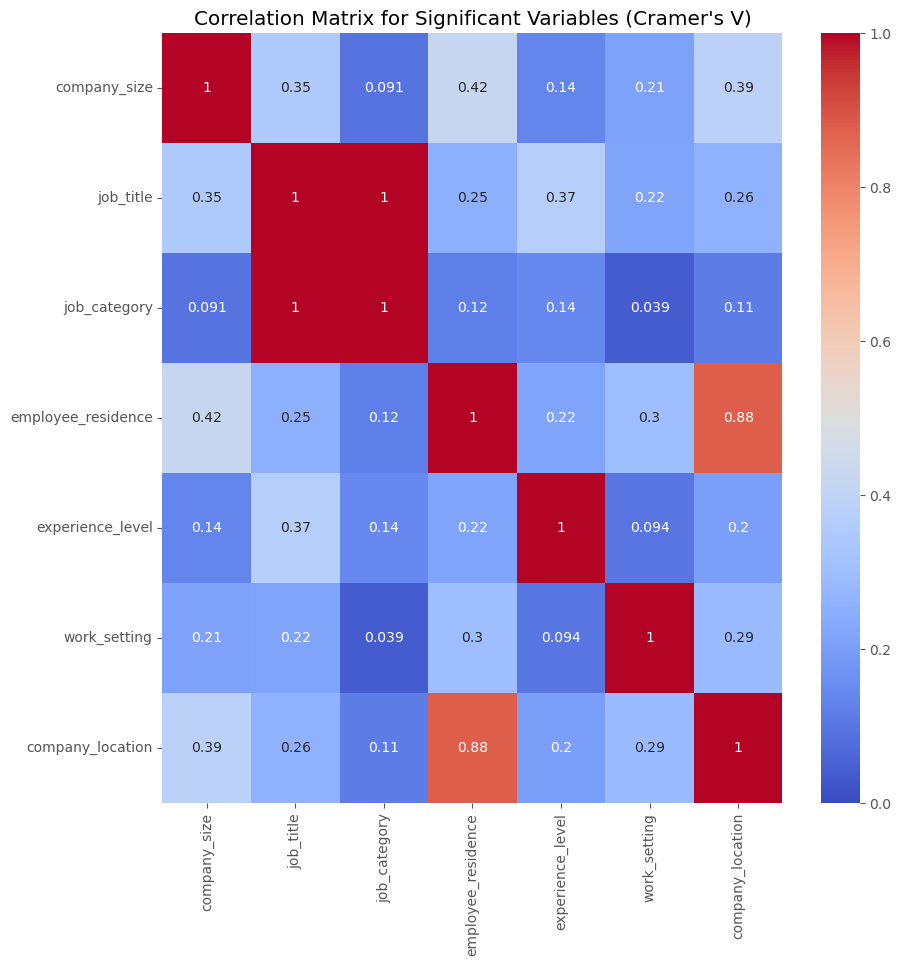

In [145]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

significant_vars = [
    'company_size', 'job_title', 'job_category', 'employee_residence',
    'experience_level', 'work_setting', 'company_location'
]

le = LabelEncoder()
df_encoded = combined_df1[significant_vars].apply(le.fit_transform)


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))


correlation_matrix = pd.DataFrame(index=significant_vars,
                                  columns=significant_vars)

for var1 in significant_vars:
    for var2 in significant_vars:
        correlation_matrix.loc[var1, var2] = cramers_v(df_encoded[var1],
                                                       df_encoded[var2])

correlation_matrix = correlation_matrix.astype(float)

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Matrix for Significant Variables (Cramer\'s V)')
plt.show()

#### best x 

In [146]:
remaining_vars = [
    'company_size', 'job_title', 'experience_level', 'work_setting', 'company_location'
]

formula = 'salary_in_usd ~ ' + ' + '.join([f'C({var})' for var in remaining_vars])
print(f'Formula for significant variables: {formula}')

model = ols(formula, data=combined_df1).fit()
print(model.summary())

Formula for significant variables: salary_in_usd ~ C(company_size) + C(job_title) + C(experience_level) + C(work_setting) + C(company_location)
                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     30.71
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:40:56   Log-Likelihood:            -1.4358e+05
No. Observations:               11612   AIC:                         2.876e+05
Df Residuals:                   11398   BIC:                         2.892e+05
Df Model:                         213                                         
Covariance Type:            nonrobust                                         
                                                               coe

In [147]:
high_salary_jobs = combined_df1[combined_df1['salary_in_usd'] > combined_df1['salary_in_usd'].median()]
job_distribution_in_medium_companies = high_salary_jobs[high_salary_jobs['company_size'] == 'Medium']['job_title'].value_counts()
print(job_distribution_in_medium_companies)

job_title
DATA SCIENTIST                     1088
DATA ENGINEER                      1038
MACHINE LEARNING ENGINEER           740
DATA ANALYST                        347
ANALYTICS ENGINEER                  257
                                   ... 
DATA QUALITY ENGINEER                 2
FINANCE DATA ANALYST                  2
STAFF DATA SCIENTIST                  1
BIG DATA ENGINEER                     1
STAFF MACHINE LEARNING ENGINEER       1
Name: count, Length: 79, dtype: int64


#### M VS  L

In [148]:
large_company_data = combined_df1[combined_df1['company_size'] == 'Large']
medium_company_data = combined_df1[combined_df1['company_size'] == 'Medium']

large_company_model = ols('salary_in_usd ~ C(job_title) + C(experience_level) + C(work_setting) + C(company_location)', data=large_company_data).fit()
large_company_summary = large_company_model.summary()

medium_company_model = ols('salary_in_usd ~ C(job_title) + C(experience_level) + C(work_setting) + C(company_location)', data=medium_company_data).fit()
medium_company_summary = medium_company_model.summary()

In [149]:
large_company_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     10.25
Date:                Thu, 13 Jun 2024   Prob (F-statistic):          3.39e-110
Time:                        18:40:57   Log-Likelihood:                -11896.
No. Observations:                 978   AIC:                         2.407e+04
Df Residuals:                     839   BIC:                         2.475e+04
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                 1.034e+05   4.61e+04      2.243      0.025    1.29e+04    1.94e+05
C(job_title)[T.AI DEVELOPER]                              5.717e+04   3.67e+04      1.559      0.119   -1.48e+04    1.29e+05
C(job_title)[T.AI ENGINEER]                              -4.604e+04   3.54e+04     -1.301      0.193   -1.15e+05    2.34e+04
C(job_title)[T.AI PRODUCT MANAGER]                        2.763e+04   5.73e+04      0.483      0.630   -8.48e+04     1.4e+05
C(job_title)[T.AI PROGRAMMER]                            -2.886e+04   3.73e+04     -0.773      0.440   -1.02e+05    4.44e+04
C(job_title)[T.AI RESEARCH ENGINEER]                     -7.872e+04   3.83e+04     -2.058      0.040   -1.54e+05   -3626.444
C(job_title)[T.AI SCIENTIST]                             -1.277e+04   3.16e+04     -0.405      0.686   -7.47e+04    4.92e+04
C(job_title)[T.ANALYTICS ENGINEER]                       -2040.4266    3.7e+04     -0.055      0.956   -7.46e+04    7.05e+04
C(job_title)[T.ANALYTICS ENGINEERING MANAGER]             2.516e+05   5.75e+04      4.376      0.000    1.39e+05    3.65e+05
C(job_title)[T.APPLIED DATA SCIENTIST]                     444.3935   2.95e+04      0.015      0.988   -5.74e+04    5.83e+04
C(job_title)[T.APPLIED MACHINE LEARNING SCIENTIST]       -4.178e+04   2.97e+04     -1.407      0.160      -1e+05    1.65e+04
C(job_title)[T.APPLIED SCIENTIST]                         8120.2049   2.71e+04      0.300      0.764    -4.5e+04    6.12e+04
C(job_title)[T.AWS DATA ARCHITECT]                        8.847e+04   4.41e+04      2.006      0.045    1885.561    1.75e+05
C(job_title)[T.AZURE DATA ENGINEER]                      -2.112e+04   5.81e+04     -0.363      0.716   -1.35e+05     9.3e+04
C(job_title)[T.BI ANALYST]                               -5.578e+04   4.69e+04     -1.190      0.235   -1.48e+05    3.63e+04
C(job_title)[T.BI DATA ANALYST]                          -7.185e+04   3.11e+04     -2.307      0.021   -1.33e+05   -1.07e+04
C(job_title)[T.BI DEVELOPER]                             -3.599e+04   4.07e+04     -0.884      0.377   -1.16e+05    4.39e+04
C(job_title)[T.BIG DATA ARCHITECT]                        2825.7733   4.51e+04      0.063      0.950   -8.57e+04    9.14e+04
C(job_title)[T.BIG DATA ENGINEER]                        -4.988e+04   3.36e+04     -1.484      0.138   -1.16e+05    1.61e+04
C(job_title)[T.BUSINESS DATA ANALYST]                    -5.609e+04   2.86e+04     -1.963      0.050   -1.12e+05      -4.389
C(job_title)[T.BUSINESS INTELLIGENCE DATA ANALYST]       -4.961e+04   3.92e+04     -1.265      0.206   -1.27e+05    2.74e+04
C(job_title)[T.BUSINESS INTELLIGENCE ENGINEER]           -4.929e+04   2.78e+04     

In [150]:
medium_company_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     30.61
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:40:58   Log-Likelihood:            -1.2782e+05
No. Observations:               10330   AIC:                         2.560e+05
Df Residuals:                   10167   BIC:                         2.572e+05
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                 1.663e+05   5.95e+04      2.795      0.005    4.97e+04    2.83e+05
C(job_title)[T.AI DEVELOPER]                             -5.973e+04   2.05e+04     -2.919      0.004   -9.98e+04   -1.96e+04
C(job_title)[T.AI ENGINEER]                              -5.002e+04   1.58e+04     -3.172      0.002   -8.09e+04   -1.91e+04
C(job_title)[T.AI PROGRAMMER]                            -1.059e+05   3.29e+04     -3.213      0.001    -1.7e+05   -4.13e+04
C(job_title)[T.AI RESEARCH ENGINEER]                     -7.494e+04   2.79e+04     -2.689      0.007    -1.3e+05   -2.03e+04
C(job_title)[T.AI SCIENTIST]                             -6.592e+04   2.12e+04     -3.111      0.002   -1.07e+05   -2.44e+04
C(job_title)[T.ANALYTICS ENGINEER]                       -6.874e+04   1.47e+04     -4.679      0.000   -9.75e+04   -3.99e+04
C(job_title)[T.APPLIED DATA SCIENTIST]                   -9.499e+04   4.23e+04     -2.244      0.025   -1.78e+05    -1.2e+04
C(job_title)[T.APPLIED MACHINE LEARNING ENGINEER]        -5.819e+04   3.23e+04     -1.801      0.072   -1.22e+05    5148.178
C(job_title)[T.APPLIED MACHINE LEARNING SCIENTIST]       -1.135e+05   2.51e+04     -4.517      0.000   -1.63e+05   -6.43e+04
C(job_title)[T.APPLIED SCIENTIST]                         -4.19e+04   1.53e+04     -2.734      0.006   -7.19e+04   -1.19e+04
C(job_title)[T.AUTONOMOUS VEHICLE TECHNICIAN]            -3.866e+04   6.04e+04     -0.640      0.522   -1.57e+05    7.97e+04
C(job_title)[T.BI ANALYST]                               -9.245e+04    1.7e+04     -5.442      0.000   -1.26e+05   -5.92e+04
C(job_title)[T.BI DATA ANALYST]                          -1.176e+05   2.03e+04     -5.792      0.000   -1.57e+05   -7.78e+04
C(job_title)[T.BI DATA ENGINEER]                         -1.259e+05   4.33e+04     -2.904      0.004   -2.11e+05   -4.09e+04
C(job_title)[T.BI DEVELOPER]                             -1.104e+05    1.6e+04     -6.912      0.000   -1.42e+05   -7.91e+04
C(job_title)[T.BIG DATA ARCHITECT]                       -1.139e+05   6.04e+04     -1.885      0.059   -2.32e+05    4560.065
C(job_title)[T.BIG DATA ENGINEER]                        -5.907e+04   3.11e+04     -1.902      0.057    -1.2e+05    1796.434
C(job_title)[T.BUSINESS DATA ANALYST]                    -1.274e+05   2.35e+04     -5.431      0.000   -1.73e+05   -8.14e+04
C(job_title)[T.BUSINESS INTELLIGENCE ANALYST]            -1.019e+05   1.52e+04     -6.710      0.000   -1.32e+05   -7.21e+04
C(job_title)[T.BUSINESS INTELLIGENCE DEVELOPER]          -1.211e+05   1.67e+04     -7.264      0.000   -1.54e+05   -8.84e+04
C(job_title)[T.BUSINESS INTELLIGENCE ENGINEER]           -8.582e+04   1.55e+04     

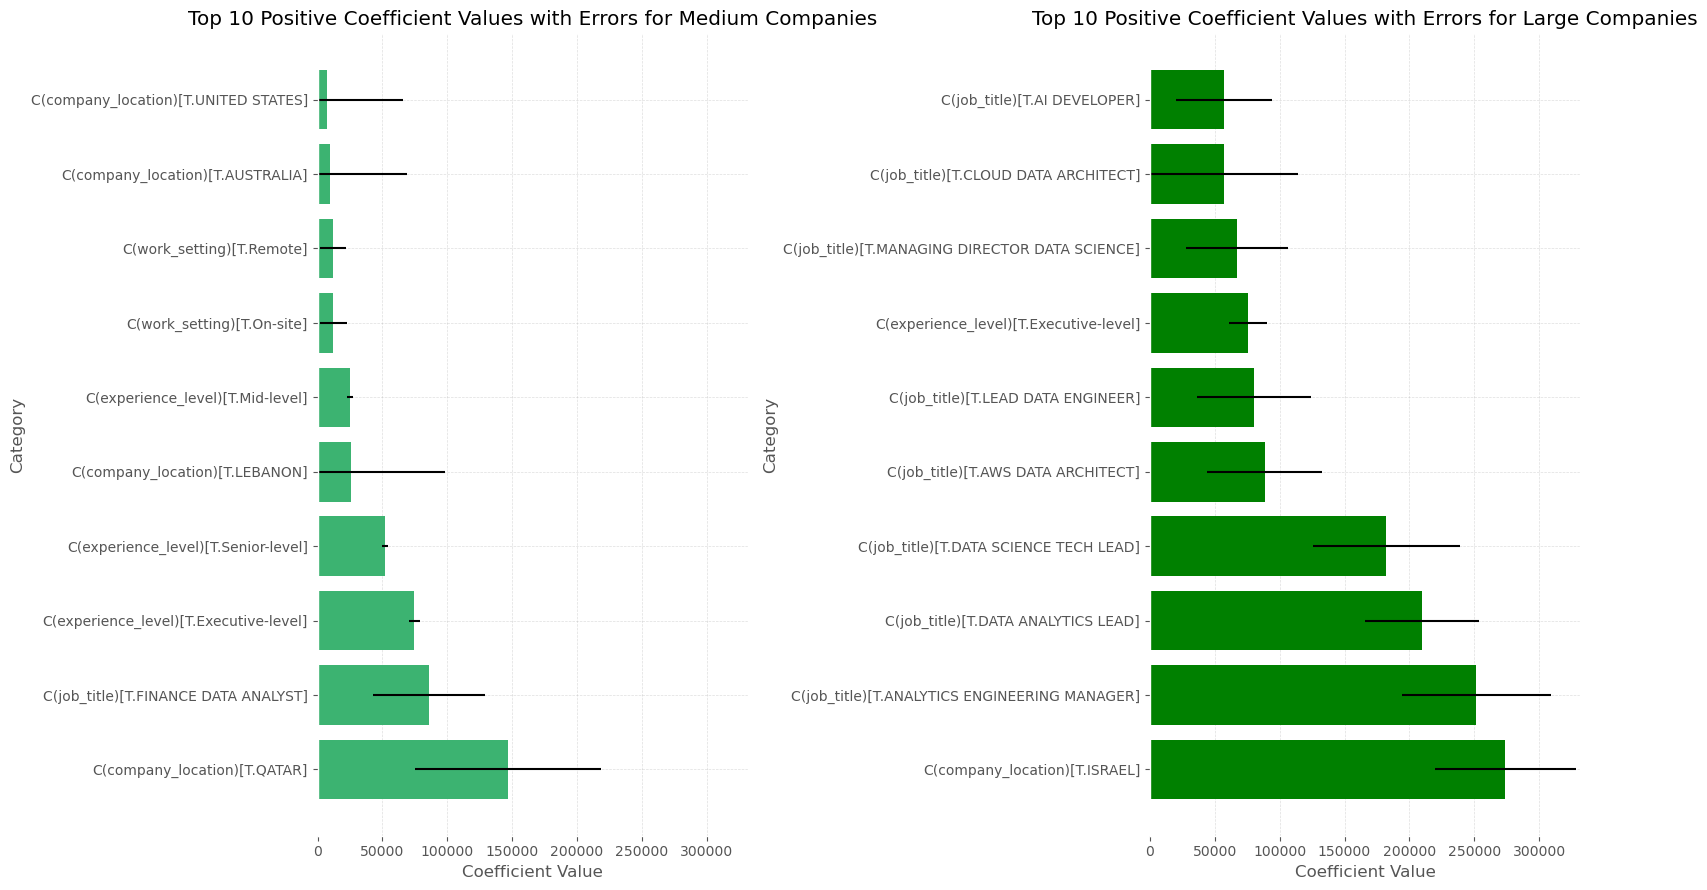

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming large_company_model and medium_company_model are already defined

large_company_coefficients = large_company_model.params
large_company_errors = large_company_model.bse
medium_company_coefficients = medium_company_model.params
medium_company_errors = medium_company_model.bse

large_company_coefficients = large_company_coefficients.drop('Intercept')
large_company_errors = large_company_errors.drop('Intercept')
medium_company_coefficients = medium_company_coefficients.drop('Intercept')
medium_company_errors = medium_company_errors.drop('Intercept')

large_coef_df = pd.DataFrame({
    'Coefficient': large_company_coefficients,
    'Error': large_company_errors
})
medium_coef_df = pd.DataFrame({
    'Coefficient': medium_company_coefficients,
    'Error': medium_company_errors
})

top_10_large_positive_coef_df = large_coef_df.nlargest(10, 'Coefficient')
top_10_medium_positive_coef_df = medium_coef_df.nlargest(10, 'Coefficient')

top_10_large_positive_coef_df['Special'] = top_10_large_positive_coef_df.index.str.contains('location')
top_10_medium_positive_coef_df['Special'] = top_10_medium_positive_coef_df.index.str.contains('location')

# Determine the maximum coefficient value to standardize the x-axis
max_coef_value = max(
    top_10_large_positive_coef_df['Coefficient'].max() + top_10_large_positive_coef_df['Error'].max(),
    top_10_medium_positive_coef_df['Coefficient'].max() + top_10_medium_positive_coef_df['Error'].max()
)

plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
bars = plt.barh(top_10_medium_positive_coef_df.index,
                top_10_medium_positive_coef_df['Coefficient'],
                xerr=top_10_medium_positive_coef_df['Error'],
                color='mediumseagreen')
plt.xlabel('Coefficient Value')
plt.ylabel('Category')
plt.title('Top 10 Positive Coefficient Values with Errors for Medium Companies')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)
plt.xlim(0, max_coef_value)

plt.subplot(1, 2, 2)
bars = plt.barh(top_10_large_positive_coef_df.index,
                top_10_large_positive_coef_df['Coefficient'],
                xerr=top_10_large_positive_coef_df['Error'],
                color='g')
plt.xlabel('Coefficient Value')
plt.ylabel('Category')
plt.title('Top 10 Positive Coefficient Values with Errors for Large Companies')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)
plt.xlim(0, max_coef_value)

plt.tight_layout()

plt.savefig('top_10_positive_coefficients.png', dpi = 500, bbox_inches='tight')

plt.show()


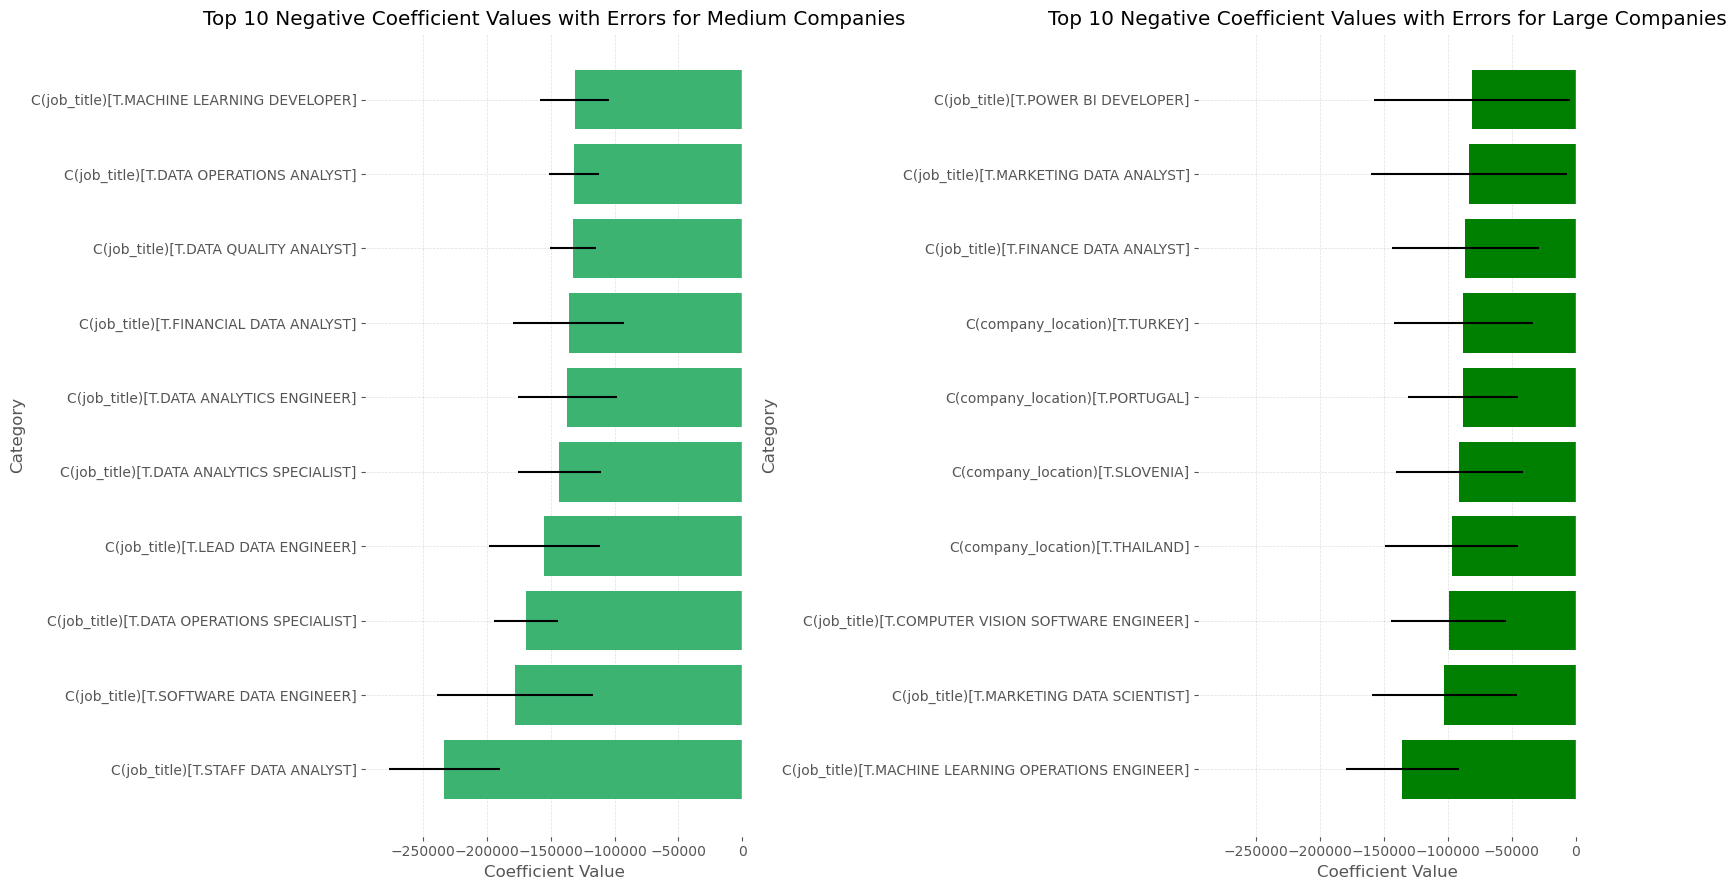

In [167]:
# Standardize x-axis for both subplots for the negative coefficients plot
top_10_large_negative_coef_df = large_coef_df.nsmallest(10, 'Coefficient')
top_10_medium_negative_coef_df = medium_coef_df.nsmallest(10, 'Coefficient')

# Determine the minimum coefficient value to standardize the x-axis
min_coef_value = min(
    top_10_large_negative_coef_df['Coefficient'].min() - top_10_large_negative_coef_df['Error'].max(),
    top_10_medium_negative_coef_df['Coefficient'].min() - top_10_medium_negative_coef_df['Error'].max()
)

plt.figure(figsize=(16, 9))

# Plot for medium companies
plt.subplot(1, 2, 1)
bars = plt.barh(top_10_medium_negative_coef_df.index,
                top_10_medium_negative_coef_df['Coefficient'],
                xerr=top_10_medium_negative_coef_df['Error'],
                #alpha=0.7,
                color='mediumseagreen')
plt.xlabel('Coefficient Value')
plt.ylabel('Category')
plt.title('Top 10 Negative Coefficient Values with Errors for Medium Companies')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)
plt.xlim(min_coef_value, 0)

# for bar, label in zip(bars, top_10_medium_negative_coef_df.index):
#     if 'location' in label.lower():
#         bar.set_edgecolor('red')
#         bar.set_linewidth(3)

# Plot for large companies
plt.subplot(1, 2, 2)
bars = plt.barh(top_10_large_negative_coef_df.index,
                top_10_large_negative_coef_df['Coefficient'],
                xerr=top_10_large_negative_coef_df['Error'],
                #alpha=0.7,
                color='green')
plt.xlabel('Coefficient Value')
plt.ylabel('Category')
plt.title('Top 10 Negative Coefficient Values with Errors for Large Companies')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)
plt.xlim(min_coef_value, 0)

# for bar, label in zip(bars, top_10_large_negative_coef_df.index):
#     if 'location' in label.lower():
#         bar.set_edgecolor('red')
#         bar.set_linewidth(3)

plt.tight_layout()

# Save the figure
plt.savefig('top_10_negative_coefficients_standardized.png', dpi = 500, bbox_inches='tight')

plt.show()

#### Summary

In medium-sized companies, locations in specific countries and high-level positions (e.g., Finance Data Analyst, executive roles) significantly boost salaries, while roles like Data Operations Analyst and Software Data Engineer lower them.

In large companies, locations in Israel and high-level positions (e.g., Analytics Engineering Manager) increase salaries, while freelance roles and positions like Machine Learning Operations Engineer decrease them.

These insights help businesses and employees understand key factors affecting salaries for better decision-making.

## Df4 and H1B

In [168]:
filtered_df4 = df4_selected[df4_selected['Job Category'].isin(['Data Science and Research'])]

In [169]:
h1b_selected['base_salary'] = h1b_selected['base_salary'].str.replace(',', '').astype(float)

In [170]:
filtered_df4 = filtered_df4.drop(columns=['Job Category'])
combined_df2_us = pd.concat([filtered_df4, h1b_selected])

In [171]:
combined_df2_us.duplicated().value_counts()

False    10559
True      4038
Name: count, dtype: int64

In [172]:
combined_df2_us.drop_duplicates(inplace=True)

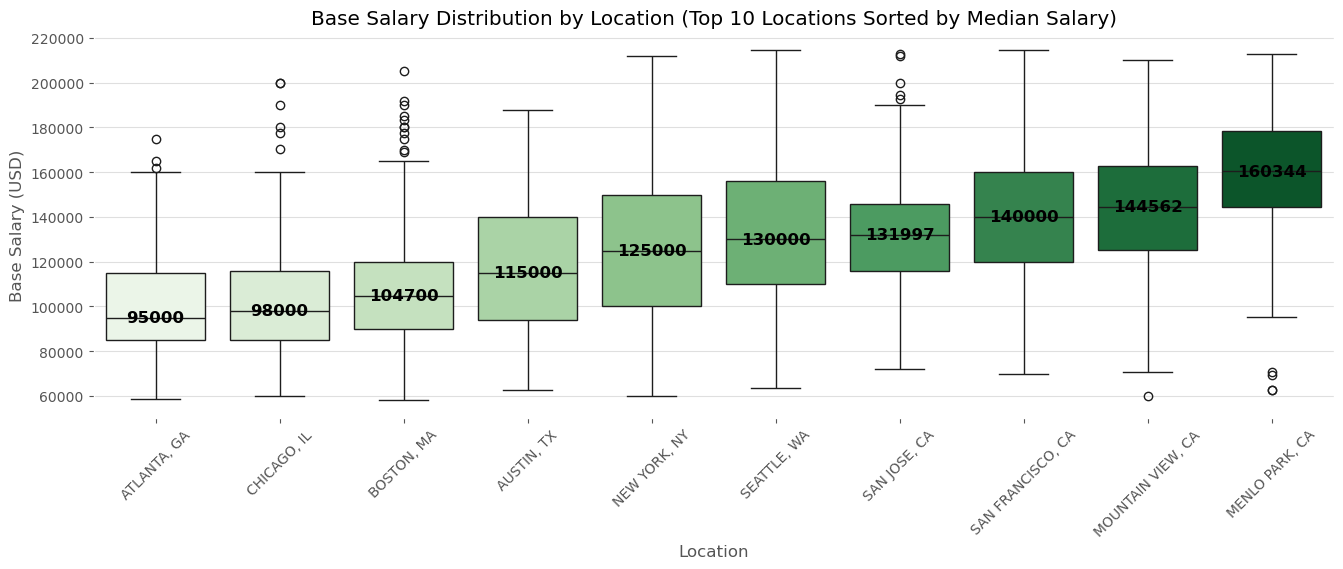

In [193]:
filtered_h1b_df_year = combined_df2_us[(
    combined_df2_us['base_salary'] > combined_df2_us['base_salary'].quantile(
        0.01)) & (combined_df2_us['base_salary'] <
                  combined_df2_us['base_salary'].quantile(0.99))]

top_locations = filtered_h1b_df_year['location'].value_counts().head(10).index
filtered_top_locations_df = filtered_h1b_df_year[
    filtered_h1b_df_year['location'].isin(top_locations)]

median_location_salaries = filtered_top_locations_df.groupby(
    'location')['base_salary'].median()
sorted_locations = median_location_salaries.sort_values().index

sorted_location_salaries = median_location_salaries.sort_values(
    ascending=False)
sorted_location_names_and_salaries = sorted_location_salaries.to_dict()

plt.figure(figsize=(16, 5))
ax_location = sns.boxplot(x='location',
                          y='base_salary',
                          data=filtered_top_locations_df,
                          order=sorted_locations,
                          palette='Greens')
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Base Salary (USD)')
plt.title(
    'Base Salary Distribution by Location (Top 10 Locations Sorted by Median Salary)'
)

medians_location = filtered_top_locations_df.groupby(
    ['location'])['base_salary'].median().reindex(sorted_locations)
for i, median in enumerate(medians_location):
    ax_location.text(i,
                     median,
                     f'{median:.0f}',
                     ha='center',
                     va='center',
                     fontweight='bold',
                     color='black',
                     size=12)

plt.savefig('salary_location.png', dpi = 500, bbox_inches='tight')

plt.show()

In [174]:
sorted_location_salaries = median_location_salaries.sort_values(ascending=False)
sorted_location_names_and_salaries = sorted_location_salaries.to_dict()
sorted_location_names_and_salaries

{'MENLO PARK, CA': 160344.0,
 'MOUNTAIN VIEW, CA': 144561.5,
 'SAN FRANCISCO, CA': 140000.0,
 'SAN JOSE, CA': 131997.0,
 'SEATTLE, WA': 130000.0,
 'NEW YORK, NY': 125000.0,
 'AUSTIN, TX': 115000.0,
 'BOSTON, MA': 104700.0,
 'CHICAGO, IL': 98000.0,
 'ATLANTA, GA': 95000.0}

In [175]:
data_scientist_location_counts = combined_df2_us['location'].value_counts(
).head(10)

data_scientist_location_counts

location
NEW YORK, NY         955
SAN FRANCISCO, CA    795
SEATTLE, WA          337
MENLO PARK, CA       311
CHICAGO, IL          262
SAN JOSE, CA         257
MOUNTAIN VIEW, CA    246
BOSTON, MA           222
ATLANTA, GA          207
SUNNYVALE, CA        201
Name: count, dtype: int64

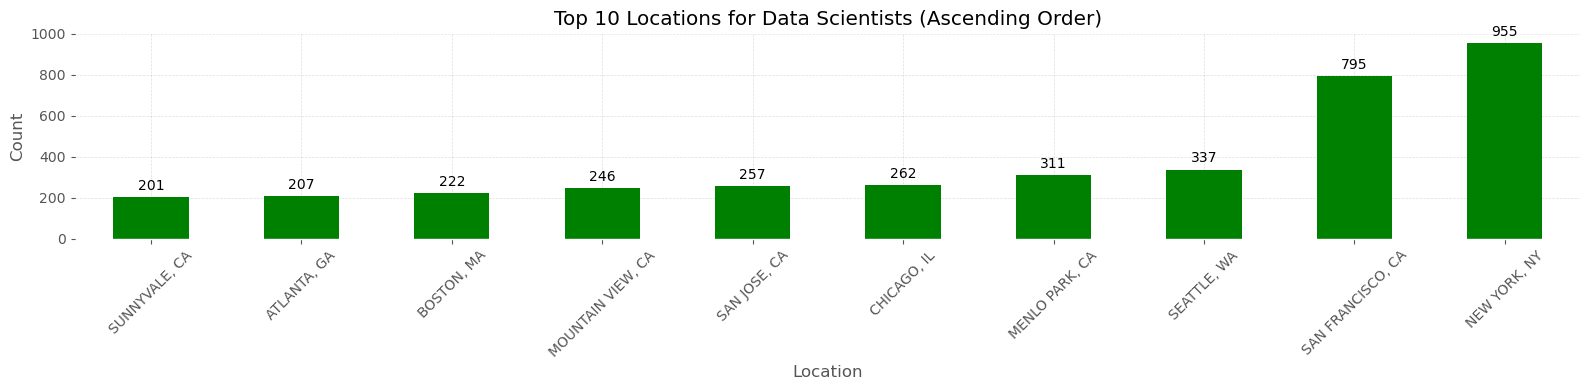

In [192]:
# Calculate the top 10 location counts
data_scientist_location_counts = combined_df2_us['location'].value_counts().head(10)
data_scientist_location_counts_sorted = data_scientist_location_counts.sort_values()

# Plot the graph with labels on the bars
plt.figure(figsize=(16, 4))
bars = data_scientist_location_counts_sorted.plot(kind='bar', color='g')#, alpha=0.7)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Locations for Data Scientists (Ascending Order)')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add labels on the bars
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center', size=10, xytext=(0, 8),
                  textcoords='offset points')

plt.tight_layout()


# Save the figure
plt.savefig('top_10_locations_data_scientists.png', dpi = 500, bbox_inches='tight')

plt.show()